# Pré-processamento dos dados com Python

Para este hands on vamos usar mais uma vez o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). 

Antes de aplicarmos qualquer classificador sobre este problema precisamos realizar o pré-processamento dos dados.

Este dataset já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## Dicionário de Dados

**Survived**: Sobrevivente (Não=0, Sim=1)

**Pclass**: Classe de ingresso (1=1st, 2=2nd, 3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos e cônjuges a bordo do Titanic

**Parch**: Quantidade de pais e filhos  a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



### Limpeza dos Dados

- Importar as bibliotecas necessárias

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Crie um dataframe com o arquivo **titanic_train.csv** ...

In [2]:
# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('titanic_train.csv')

- Visualize os 5 primeiros elementos do seu data set

In [3]:
# Exibir as primeiras linhas do DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Podemos usar o seaborn para criar um mapa de calor simples, heatmap, para visualizar as colunas onde faltam mais dados!

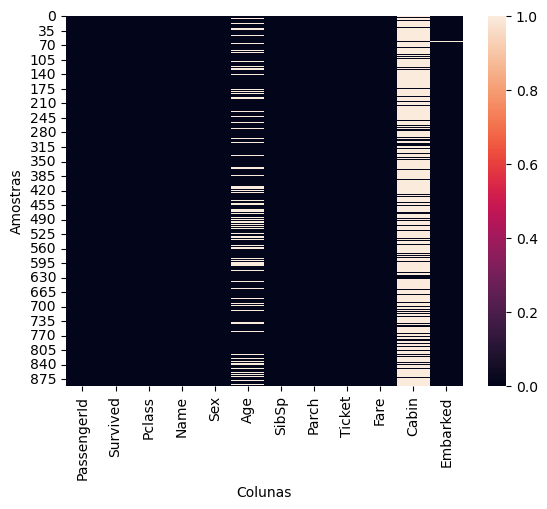

In [4]:
# Criar um mapa de calor para visualizar os valores ausentes
sns.heatmap(df.isnull())

# Configurar os rótulos dos eixos
plt.xlabel('Colunas')
plt.ylabel('Amostras')

# Exibir o mapa de calor
plt.show()

* Calcule o percentual de valores faltantes para cada coluna
    - Devemos eliminar a coluna "Age"? Qual a melhor forma de realizar um input para os valores faltantes?
    - E quanto a coluna "Cabin", o que devemos fazer? Será que poderíamos inferir esse valor?

In [5]:
# Calcular o percentual de valores faltantes para cada coluna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Exibir o percentual de valores faltantes
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


* Plot o percentual de valores faltantes para cada coluna

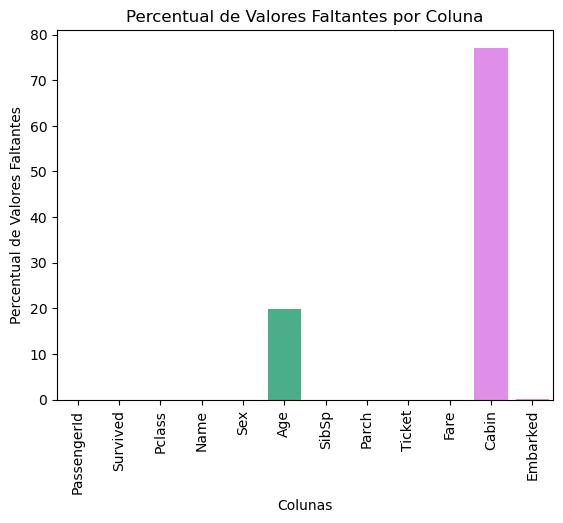

In [6]:
# Plotar o percentual de valores faltantes
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Colunas')
plt.ylabel('Percentual de Valores Faltantes')
plt.title('Percentual de Valores Faltantes por Coluna')
plt.show()

- Como há poucas amostras sem o valor do atributo **Age** podemos realizar o input desta feature.
Qual a melhor maneira de preencher o valor da idade? Seria com a média, mediana ou com alguma função que considera algum filtro?

In [7]:
#Utilizando a média ou mediana da idade de cada classe para fazer o preenchimento.

- Utilize a função describe e visualize o atributo **Age**. ***Dica:*** Sua decisão pode ser um filtro para recuperar a média ou mediana da idade por classe

In [8]:
# Obter estatísticas descritivas do atributo Age por classe
print(df.groupby('Pclass')['Age'].describe())

        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0


- Para preencher a coluna **Age** você pode criar:
    - uma função que retorne um valor, e posteriormente aplicar na coluna **Age**, por exemplo **df['column'] = df[['column']].apply(function, axis=1)**.
    - ou utilizar a função fillna()

In [9]:
# Calcular a média da idade por classe
age_by_class_mean = df.groupby('Pclass')['Age'].mean()

# Preencher os valores faltantes na coluna Age com a média da idade por classe
df['Age'].fillna(df['Pclass'].map(age_by_class_mean), inplace=True)

- Crie um novo mapa de calor.

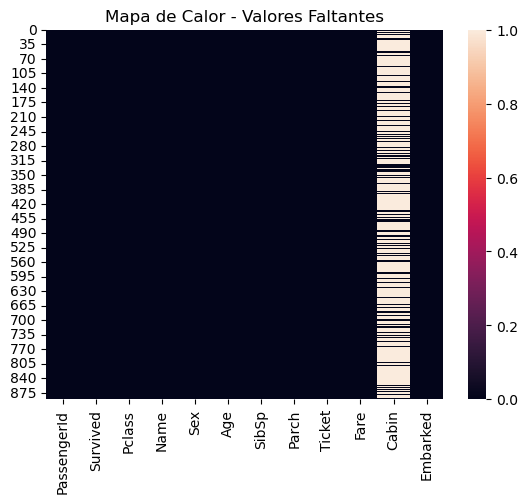

In [10]:
# Mapa de calor dos valores faltantes
sns.heatmap(df.isnull())
plt.title('Mapa de Calor - Valores Faltantes')
plt.show()

* Elimine as colunas **Cabin e PassengerId** do DataSet. Por quê mesmo vamos eliminá-las?

In [11]:
# "Cabin": A coluna tem uma grande quantidade de valores faltantes. O campo Cabine não é relevante.

# "PassengerId": É apenas um Id usado exclusivamente para identificar cada passageiro. Não é relevante.

# Elimina as colunas "Cabin" e "PassengerId"
df = df.drop(["Cabin", "PassengerId"], axis=1)

* Construa um novo heatmap e verifique se ainda há algum valor nulo.

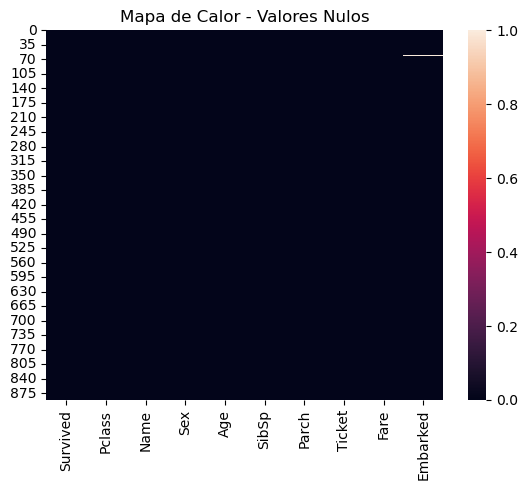

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64


In [12]:
# Mapa de calor dos valores nulos
sns.heatmap(df.isnull())
plt.title('Mapa de Calor - Valores Nulos')
plt.show()

# Verificar se ainda há valores nulos
print(df.isnull().sum())

* Pesquise por amostras que ainda tenha valores nulos e elimine-os! ***Dica:*** df.dropna(inplace=True). 
- Verique quantos registros serão eliminados, para saber se vale a pena realizar o input dos valores.

In [13]:
# Verificar a quantidade de registros antes de eliminar os valores nulos
print("Quantidade de registros antes da eliminação:", len(df))

Quantidade de registros antes da eliminação: 891


In [14]:
# Eliminar as amostras com valores nulos
df.dropna(inplace=True)

In [15]:
# Verificar a quantidade de registros após a eliminação
print("Quantidade de registros após a eliminação:", len(df))

Quantidade de registros após a eliminação: 889


### Criação e/ou Transformação

Precisamos converter atributos categóricos em variáveis numéricas usando pandas, a função **get_dummies** aplica o labelEncoding e OneHotEncoding!
Caso contrário, nosso algoritmo de ML não será apto para trabalhar com recursos diretamente categóricos como entradas.

### Hands on

* Veja o exemplo abaixo ou veja esta [dica!](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [16]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
df.drop(['Sex'], axis=1, inplace=True)
df = pd.concat([df, sex], axis=1)

* Refaça o mesmo processo de tratamento para **todos** os atributos categóricos (por exemplo, o atributo **Embarked**). Visualize como os seus dados estão ficando

In [17]:
# One-hot encoding para o atributo "Embarked"
embarked = pd.get_dummies(df['Embarked'], drop_first=True)
#df.drop(['Embarked'], axis=1, inplace=True)
df = pd.concat([df, embarked], axis=1)

# Visualizar os dados atualizados
print(df.head())

   Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch            Ticket     Fare Embarked  male  Q  S  
0      1      0         A/5 21171   7.2500        S     1  0  1  
1      1      0          PC 17599  71.2833        C     0  0  0  
2      0      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      1      0            113803  53.1000        S     0  0  1  
4      0      0            373450   8.0500        S     1  0  1  


In [18]:
# One-hot encoding para o atributo 'Pclass'
pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
#df.drop(['Pclass'], axis=1, inplace=True)
df = pd.concat([df, pclass], axis=1)

# Visualizar os dados atualizados
print(df.head())

   Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch            Ticket     Fare Embarked  male  Q  S  Pclass_2  \
0      1      0         A/5 21171   7.2500        S     1  0  1         0   
1      1      0          PC 17599  71.2833        C     0  0  0         0   
2      0      0  STON/O2. 3101282   7.9250        S     0  0  1         0   
3      1      0            113803  53.1000        S     0  0  1         0   
4      0      0            373450   8.0500        S     1  0  1         0   

   Pclass_3  
0         1  
1         0  
2         1  


In [19]:
# One-hot encoding para o atributo 'male'
sex = pd.get_dummies(df['male'], prefix='Sex', drop_first=True)
#df.drop(['male'], axis=1, inplace=True)
df = pd.concat([df, sex], axis=1)

# Visualizar os dados atualizados
print(df.head())

   Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch            Ticket     Fare Embarked  male  Q  S  Pclass_2  \
0      1      0         A/5 21171   7.2500        S     1  0  1         0   
1      1      0          PC 17599  71.2833        C     0  0  0         0   
2      0      0  STON/O2. 3101282   7.9250        S     0  0  1         0   
3      1      0            113803  53.1000        S     0  0  1         0   
4      0      0            373450   8.0500        S     1  0  1         0   

   Pclass_3  Sex_1  
0         1      1  
1         0   

- Você pode usar a função info() para visualizar informações do seu dataFrame

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
 9   male      889 non-null    uint8  
 10  Q         889 non-null    uint8  
 11  S         889 non-null    uint8  
 12  Pclass_2  889 non-null    uint8  
 13  Pclass_3  889 non-null    uint8  
 14  Sex_1     889 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(6)
memory usage: 74.7+ KB


* Remova as variáveis que passaram pelo processo de one hot encoding.

In [21]:
df.drop(['Pclass', 'Embarked', 'male'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Name      889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Ticket    889 non-null    object 
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
 9   Pclass_2  889 non-null    uint8  
 10  Pclass_3  889 non-null    uint8  
 11  Sex_1     889 non-null    uint8  
dtypes: float64(2), int64(3), object(2), uint8(5)
memory usage: 59.9+ KB


* O que o código acima fez? Por quê não foram adicionadas as colunas "Female" e "C"?

In [22]:
# As colunas 'female' e 'C' não são geradas diretamente pelo processo de one-hot encoding.
# Em vez disso, elas são derivadas da coluna 'Sex' e 'Embarked' durante o processo de criação das variáveis dummy.
# Nesse caso, o DataFrame resultante não terá colunas 'female' e 'C', mas sim a coluna 'male' gerada a partir da variável 'Sex'
# e colunas 'Q' e 'S' geradas a partir da variável 'Embarked'.
# Portanto, não é necessário remover as colunas 'female' e 'C'.

- Aplique normalização sobre as tarifas. Crie a sua função ou veja esta [dica!](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- *P.S.: Vale a pena realizar normalização sobre todo o dataset?*

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

- Você pode criar uma nova feature com base na idade da pessoa, (por exemplo, criança, jovem, adulto e criança), no lugar da idade.

In [24]:
# Criar a nova feature com base na idade
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, df['Age'].max()],
                        labels=['Criança', 'Jovem', 'Adulto', 'Idoso'], right=False)

- Você pode substituir o nome pelos pronomes de tratamento (por exemplo, Miss., Mrs)

In [25]:
import re

def get_pronome_tratamento(name):
        pattern = re.search("\\,(.+?)\\.", name)
        found='Other'
        if pattern:
            found = pattern.group(1)
        return found

- Existe alguma informação que você pode substituir pelo ticket? Uma média de tarifa por exemplo, considerando a primeira letra do bilhete. Por quê realizar este tipo de tratamento?

In [26]:
# O atributo "Ticket" geralmente representa o número do bilhete de cada passageiro.
# Seu valor em si pode não conter informações úteis para substituir outros atributos.
# É possível explorar o atributo "Ticket" em conjunto com outros atributos para obter informações adicionais.
# Ou identificar padrões. Por exemplo, analisar o formato ou prefixo dos números de bilhete pode revelar alguma informação
# relevante, como a classe de acomodação ou a localização no navio. Nesse caso, essas informações podem ser usadas para
# criar novas features ou substituir valores ausentes em outros atributos.

* Salve o dataset tratado em um arquivo chamado 'titanic_ready_to_ml.csv'

In [27]:
df.to_csv('titanic_ready_to_ml.csv', index=False)

### Desafio

- Se você deseja aplicar o mesmo pipeline de transformações sobre o dataset **titanic_test.csv** seria necessário criar um pipeline de transformações, a criação de um pipeline customizado tornaria esta tarefa mais fácil. Veja esta [dica!](https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65)